Activation: source tens/bin/activate

In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib

Loading And EDA

In [24]:
data = pd.read_csv("/Users/welpp/Desktop/Practical Data Science/Data/Data Main/goes_13to18.csv")

In [54]:
data['time'] = pd.to_datetime(data['time']).dt.tz_localize(None)
## splitting data
train = data[data['time'] < "2023-01-01"]
test = data[data['time'] < "2023-01-01"]
X_train = train[['time', 'xrsa_flux', 'xrsb_flux']]
y_train = train['status']
X_test = test[['time', 'xrsa_flux', 'xrsb_flux']]
y_test = test['status']

In [55]:
data.head()
data.size

43221498

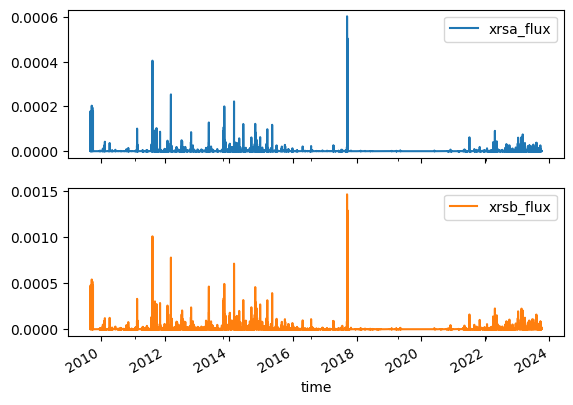

In [61]:
## visualization of the data
plot_cols = ['xrsa_flux', 'xrsb_flux']
plot_features = data[plot_cols]
plot_features.index = data['time']
_ = plot_features.plot(subplots=True)


In [67]:
start_date = pd.to_datetime('2017-09-05')
end_date = pd.to_datetime('2017-09-11')

indices_between_dates = (data['time'] >= start_date) & (data['time'] <= end_date)
selected_indices = data.index[indices_between_dates]
selected_indices

Index([4025457, 4025458, 4025459, 4025460, 4025461, 4025462, 4025463, 4025464,
       4025465, 4025466,
       ...
       4034088, 4034089, 4034090, 4034091, 4034092, 4034093, 4034094, 4034095,
       4034096, 4034097],
      dtype='int64', length=8641)

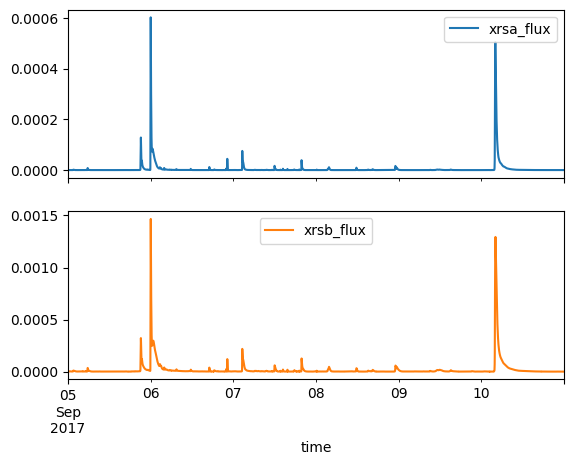

In [69]:
plot_features = data[plot_cols][4025457:4034097]
plot_features.index = data['time'][4025457:4034097]
_ = plot_features.plot(subplots=True)

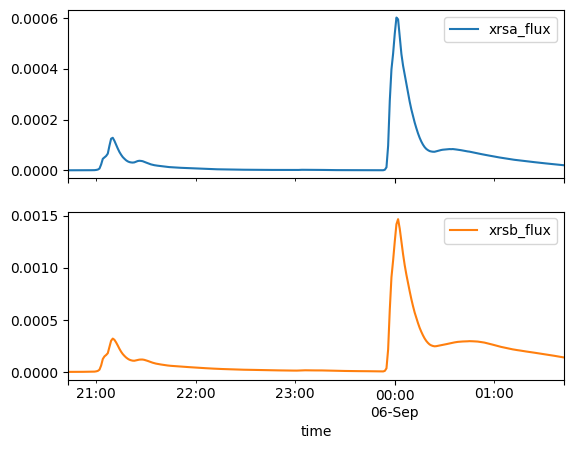

In [75]:
plot_features = data[plot_cols][4026700:4027000]
plot_features.index = data['time'][4026700:4027000]
_ = plot_features.plot(subplots=True)

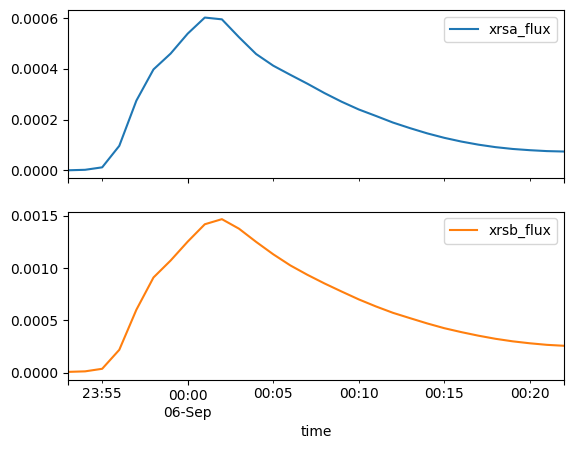

In [83]:
## observe high spike
plot_features = data[plot_cols][4026890:4026920]
plot_features.index = data['time'][4026890:4026920]
_ = plot_features.plot(subplots=True)

In [91]:
data.loc[4026899]

time           2017-09-06 00:02:00
xrsa_flux                 0.000595
xrsb_flux                 0.001466
status                           1
flare_class                  X14.6
Sat                             16
Name: 4026899, dtype: object

LSTM

In [20]:
## LSTM Model
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')


IndexError: tuple index out of range

In [ ]:
model.fit(input_sequence, output_sequence, epochs=100, batch_size=1)

In [ ]:
predicted_values = model.predict(input_sequence)